In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [324]:
of_df = pd.read_parquet("/Users/betsyfrdmn/Desktop/Lucas Code/of_df.parquet")

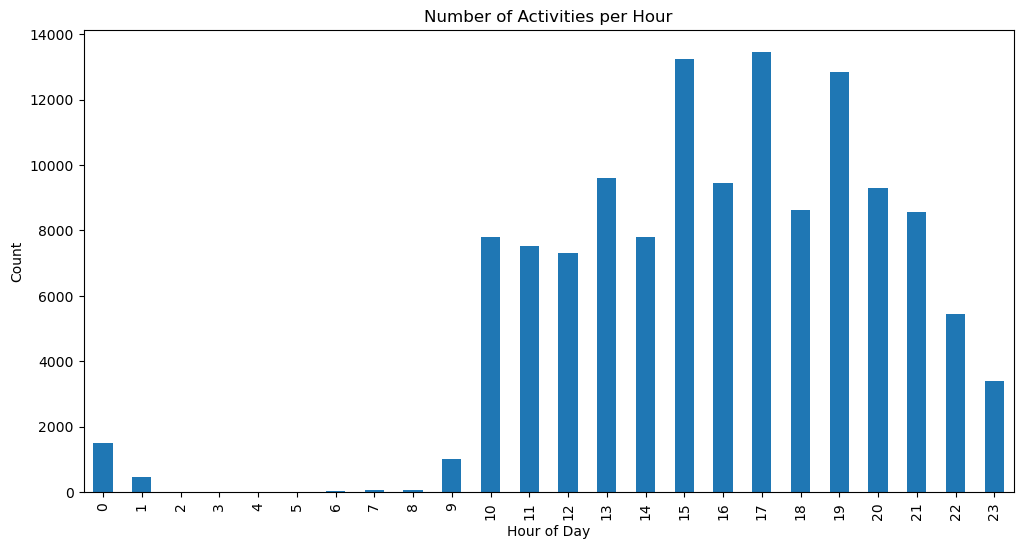

In [ ]:
hour_counts = of_df["Hour"].value_counts().sort_index()

# force all hours 0–23 to appear
hour_counts = hour_counts.reindex(range(24), fill_value=0)

# plot
hour_counts.plot(kind="bar", figsize=(12,6))
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.title("Number of Activities per Hour")
plt.show()


In [237]:
of_df[["Quantity", "Weight", "Cube"]].describe()
#of_df["Quantity"].hist(bins=50)


,Quantity,Weight,Cube
count,126808.000000,126582.000000,126582.000000
mean,8.888177,5.442953,0.527723
std,32.432011,9.239953,0.930133
min,1.000000,0.000000,0.000000
25%,1.000000,0.159000,0.018000
50%,2.000000,1.200000,0.128000
75%,8.000000,7.000000,0.756000
max,2400.000000,539.000000,23.518000


In [238]:
# of_df["Aisle"].describe()
of_df["Level"].value_counts().sort_index()


Level
1.0     53896
2.0     28616
3.0     21787
4.0     11885
5.0      5123
6.0      1487
7.0      1111
8.0       966
9.0       818
10.0      522
11.0      597
Name: count, dtype: int64

In [239]:
of_df["Bay"].unique()

<IntegerArray>
[   4,    9,   33,   46,   53,   49,   45,   39,   41,   37,   30,   10,   54,
   20,   17,   51,    6,   25,   48,    8,   27,   22,   16,   28,   32,    3,
   35,   44,   12,   21,   42,   23,   14,   26,   40,   24,   38,   52,    5,
    7,   47,   11,   19,   15,   13,   36,   50,   31,    1,   18,   43,   55,
   29,   56, <NA>,   34,    2]
Length: 57, dtype: Int64

In [241]:
of_df["Aisle"].unique()

<IntegerArray>
[  20,   22,   21,   71,   29,   70,   30,   72,   73,   74,   39,   19,   23,
   24,   64,   25,   75,   41,   27,   43,   26,   28,   36,   54,   31,   84,
   86,   32,   37,   44, <NA>,   38,   40,   42,   65,   51,   52,   55,   56,
   87,   83,   82,   50,   53,   85,   88,   57,   66,   58,   59]
Length: 50, dtype: Int64

In [242]:
of_df = of_activity.copy()

of_df = of_df.merge(of_location, on="LocationID", how="left")
of_df = of_df.merge(of_products, on="ProductID", how="left")

of_df["Timestamp"] = pd.to_datetime(of_df["Timestamp"])
of_df = of_df.sort_values(["UserID", "Timestamp"])
of_df["Hour"] = of_df["Timestamp"].dt.floor("H")
of_df["Time_Diff"] = (
    of_df.groupby("UserID")["Timestamp"]
      .diff()
      .dt.total_seconds() / 3600
)
of_df["Shift"] = (
    (of_df["Time_Diff"] >= 3)
    .groupby(of_df["UserID"])
    .cumsum() + 1
)

of_df.loc[
    of_df.groupby(["UserID", "Shift"]).cumcount() == 0,
    "Time_Diff"
] = np.nan


#of_df[of_df["Shift"]==2].sort_values("Timestamp").head(5)
#of_df.sort_values(["Timestamp"]).head(5)

/var/folders/r9/zx84vhy57q9_n8tk5dnw8g980000gn/T/ipykernel_6345/334765647.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  of_df["Hour"] = of_df["Timestamp"].dt.floor("H")


In [243]:
# of_df[of_df["UserID"]==80][of_df["Work_Queue_Number"] == 5]["AssignmentID"].nunique()

In [244]:
of_df.groupby(["UserID", "Shift"]).agg({"Time_Diff": "sum"}).rename(columns={"Time_Diff": "Length_of_Shift"}).head(25)


Length_of_Shift
UserID Shift                 
80     1             4.567694
       2             1.498610
       3             4.304769
       4             0.564494
       5             3.644825
307    1             6.265409
       2             5.932933
       3             5.994751
       4             5.536219
       5             6.012359
       6             5.839042
       7             5.710996
       8             5.658510
326    1            11.332534
       2             9.197115
       3            10.157718
       4            10.123506
       5            11.082049
350    1             3.017492
       2             0.358449
443    1             4.997292
       2            10.192081
       3             9.740868
       4            12.038042
       5             6.223272

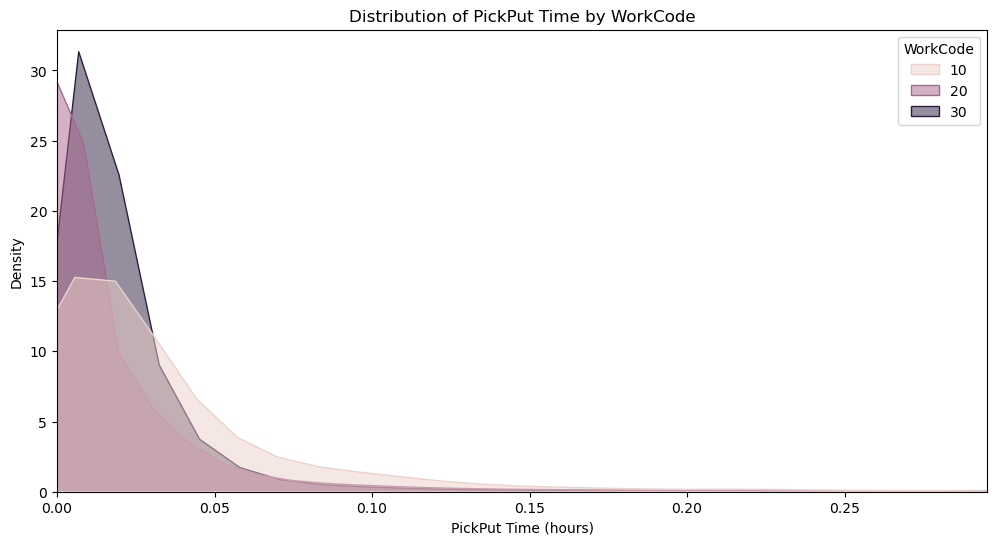

In [245]:
plt.figure(figsize=(12, 6))

plot_df = of_df.dropna(subset=["Time_Diff"])

sns.kdeplot(
    data=plot_df,
    x="Time_Diff",
    hue="WorkCode",
    fill=True,
    common_norm=False,
    alpha=0.5
)

plt.xlabel("PickPut Time (hours)")
plt.ylabel("Density")
plt.title("Distribution of PickPut Time by WorkCode")
plt.xlim(0, plot_df["Time_Diff"].quantile(0.99))
plt.show()

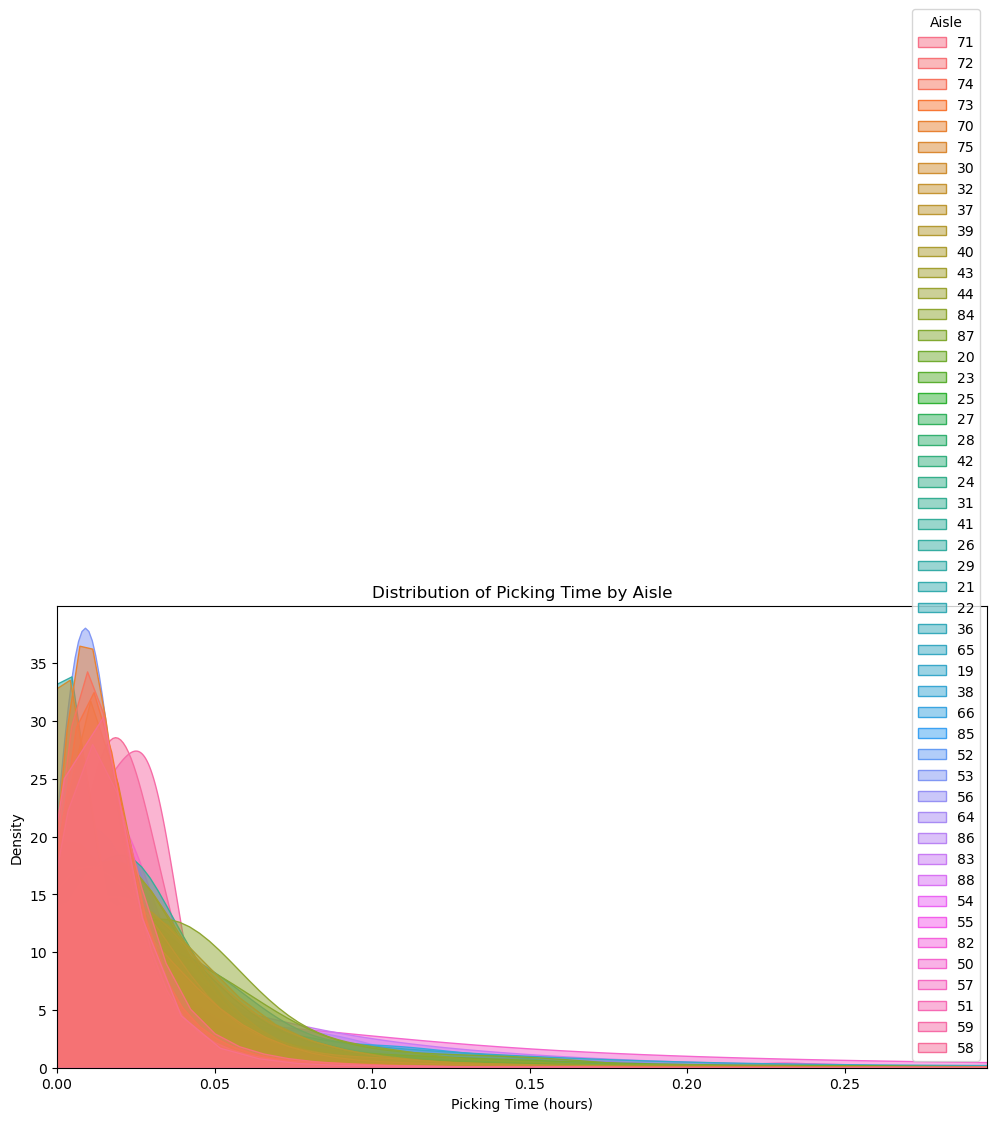

In [246]:
plot_df = of_df.dropna(subset=["Time_Diff"])

plt.figure(figsize=(12,6))

sns.kdeplot(
    data=plot_df,
    x="Time_Diff",
    hue="Aisle",
    fill=True,
    common_norm=False,
    alpha=0.5
)

plt.xlabel("Picking Time (hours)")
plt.ylabel("Density")
plt.title("Distribution of Picking Time by Aisle")
plt.xlim(0, plot_df["Time_Diff"].quantile(0.99))
plt.show()


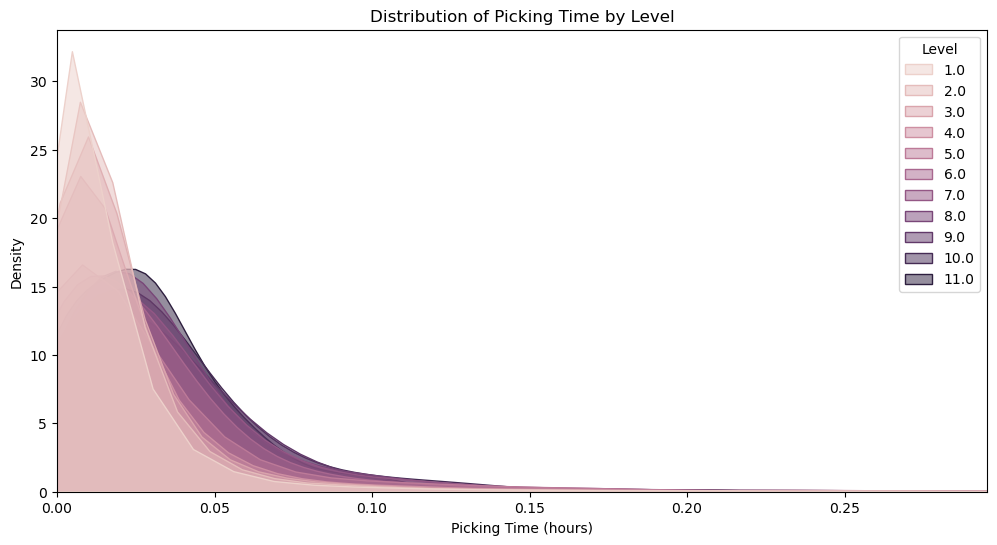

In [247]:
plot_df = of_df.dropna(subset=["Time_Diff"])

plt.figure(figsize=(12,6))

sns.kdeplot(
    data=plot_df,
    x="Time_Diff",
    hue="Level",
    fill=True,
    common_norm=False,
    alpha=0.5
)

plt.xlabel("Picking Time (hours)")
plt.ylabel("Density")
plt.title("Distribution of Picking Time by Level")
plt.xlim(0, plot_df["Time_Diff"].quantile(0.99))
plt.show()


In [ ]:
# 1. Prep the data: Drop NaNs and grab the top 20 by picking time
# Create the summary data for the plot
plot_df = of_df.dropna(subset=["Time_Diff"]).groupby(["Aisle", "Level"]).agg(
    Mean_Picking_Time=("Time_Diff", "mean"),
    Count=("Time_Diff", "count")
).reset_index()

plt.figure(figsize=(14, 8))

sns.scatterplot(
    data=plot_df,
    x="Aisle",
    y="Mean_Picking_Time",
    size="Count",
    hue="Level",
    sizes=(100, 1000),
    alpha=0.7,
    palette="viridis",
    edgecolor="black"
)

plt.title("Top 20 Aisle-Level Combinations by Mean Picking Time", fontsize=16)
plt.ylabel("Mean Picking Time (hours)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

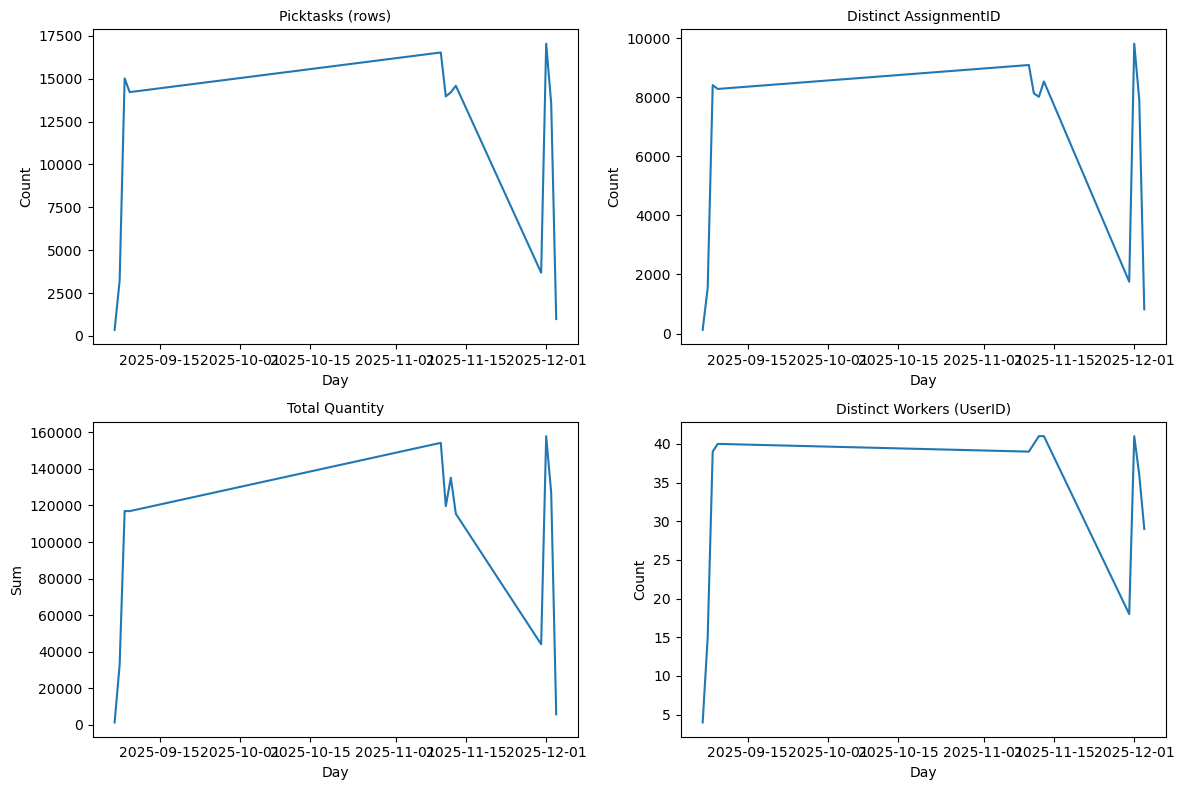

                        mean     min       max
picktasks       10617.250000   350.0   17049.0
assignments      6039.250000   122.0    9821.0
total_quantity  93924.333333  1304.0  157945.0
workers            31.916667     4.0      41.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = of_activity.copy()
# 1. Prepare the data
# Assuming df_activity is your first table
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.date

# 2. Daily Aggregation
daily_stats = df.groupby('Day').agg(
    picktasks=('ActivityCode', 'count'),          # Total rows
    assignments=('AssignmentID', 'nunique'),     # Distinct AssignmentIDs
    total_quantity=('Quantity', 'sum'),          # Sum of Quantity
    workers=('UserID', 'nunique')                # Distinct UserIDs
).reset_index()

# 3. Create the Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

metrics = [
    ('picktasks', 'Picktasks (rows)', axes[0, 0]),
    ('assignments', 'Distinct AssignmentID', axes[0, 1]),
    ('total_quantity', 'Total Quantity', axes[1, 0]),
    ('workers', 'Distinct Workers (UserID)', axes[1, 1])
]

for col, title, ax in metrics:
    ax.plot(daily_stats['Day'], daily_stats[col])
    ax.set_title(title, fontsize=10)
    ax.set_ylabel('Count' if 'quantity' not in col else 'Sum')
    ax.set_xlabel('Day')
    # Rotate x-labels if they get crowded
    plt.setp(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# 4. Generate the Summary Table
summary_table = daily_stats[['picktasks', 'assignments', 'total_quantity', 'workers']].agg(['mean', 'min', 'max']).T
print(summary_table)

In [ ]:
of_products[of_products["ProductID"] == 28572.0]

,ProductID,ProductCode,UnitOfMeasure,Weight,Cube,Length,Width,Height
28571,28572,4352T2168284,CA,12.19,1.006,NaN,NaN,NaN


In [ ]:
df_grouped = df.groupby(["AssignmentID", "LocationID"]).agg("Pick Time").mean


In [ ]:
# sort by AssignmentID then Timestamp and compute difference to previous timestamp within same assignment
df = df.sort_values(["AssignmentID", "Timestamp"])
df["time_diff"] = df.groupby("AssignmentID")["Timestamp"].diff()
df["time_diff_sec"] = df["time_diff"].dt.total_seconds()

df.head()

,ActivityCode,UserID,WorkCode,AssignmentID,ProductID,Quantity,Timestamp,LocationID,Aisle,Bay,...,Slot,ProductCode,UnitOfMeasure,Weight,Cube,Length,Width,Height,time_diff,time_diff_sec
94594,AssignmentOpen,899,10,7786482,NaN,NaN,2025-09-06 03:13:28.077,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
94595,PickPut,899,10,7786482,37846.0,5.0,2025-09-06 03:17:28.263,14852.0,43,45.0,...,1.0,6034TX990203,EA,0.31,0.031,NaN,NaN,NaN,0 days 00:04:00.186000,240.186
94596,AssignmentOpen,899,10,7786483,NaN,NaN,2025-09-06 03:18:32.723,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
94597,PickPut,899,10,7786483,53145.0,10.0,2025-09-06 03:27:36.170,150637.0,20,17.0,...,2.0,460001243A,CS,1.38,0.330,NaN,NaN,NaN,0 days 00:09:03.447000,543.447
94598,PickPut,899,10,7786483,41453.0,5.0,2025-09-06 03:31:35.690,244318.0,21,46.0,...,1.0,4352SC096CHG,PK,0.05,0.001,NaN,NaN,NaN,0 days 00:03:59.520000,239.520


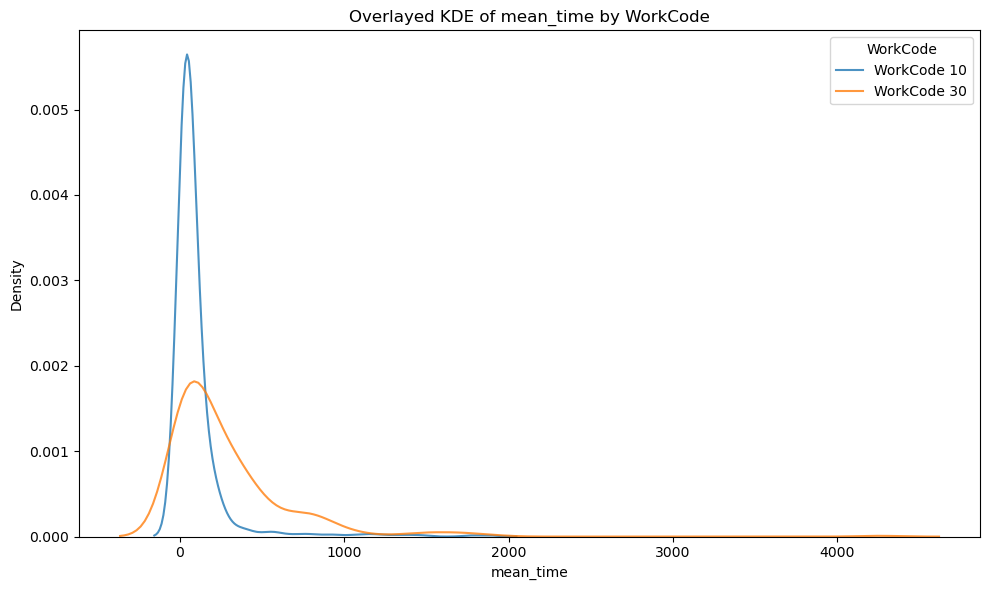

In [ ]:
# aggregate time_diff_sec by AssignmentID, LocationID, WorkCode
agg = (
    df.dropna(subset=["time_diff_sec"])
      .groupby(["AssignmentID", "LocationID", "WorkCode"], as_index=False)
      .agg(
          mean_time=("time_diff_sec", "mean"),
          sum_time=("time_diff_sec", "sum"),
          median_time=("time_diff_sec", "median"),
          n=("time_diff_sec", "count"),
      )
)

# overlayed KDEs per WorkCode (using mean_time)
metric = "mean_time"

plt.figure(figsize=(10, 6))
workcodes = sorted(agg["WorkCode"].unique())
for wc in workcodes:
    vals = agg.loc[(agg["WorkCode"] == wc) & (agg["n"] > 1), metric]
    if len(vals) > 1:
        sns.kdeplot(vals, label=f"WorkCode {wc}", bw_adjust=1, common_norm=False, alpha=0.8)

plt.xlabel(metric)
plt.ylabel("Density")
plt.title(f"Overlayed KDE of {metric} by WorkCode")
plt.legend(title="WorkCode")
plt.tight_layout()
plt.show()

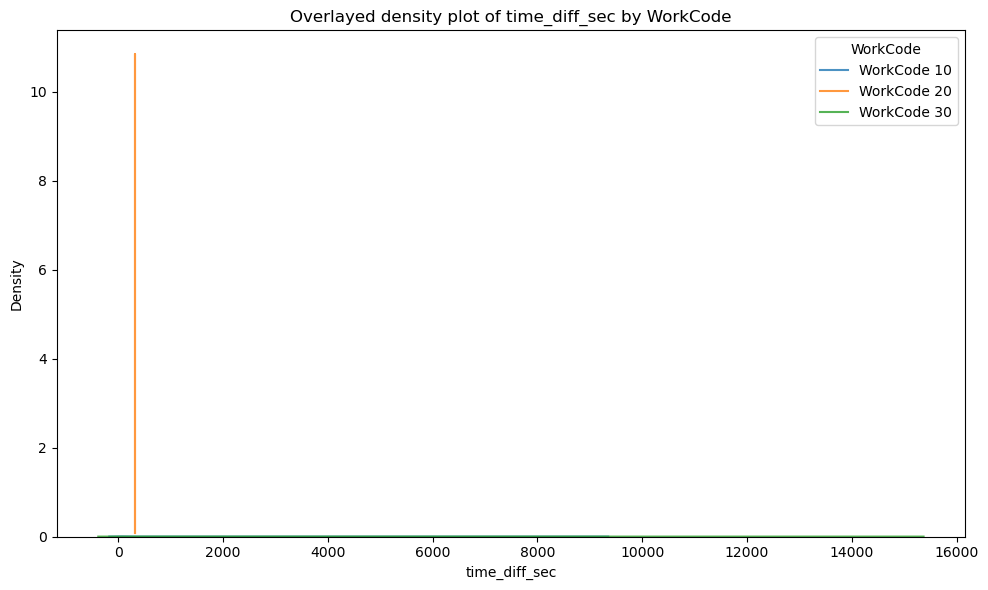

In [ ]:
import seaborn as sns

# use df from notebook; drop missing time_diff_sec
plot_df = df.dropna(subset=["time_diff_sec", "WorkCode"])
workcodes = sorted(plot_df["WorkCode"].unique())

plt.figure(figsize=(10, 6))
for wc in workcodes:
    vals = plot_df.loc[plot_df["WorkCode"] == wc, "time_diff_sec"]
    if len(vals) > 1:
        sns.kdeplot(vals, label=f"WorkCode {wc}", bw_adjust=1, common_norm=False, alpha=0.8)

plt.xlabel("time_diff_sec")
plt.ylabel("Density")
plt.title("Overlayed density plot of time_diff_sec by WorkCode")
plt.legend(title="WorkCode")
plt.tight_layout()
plt.show()

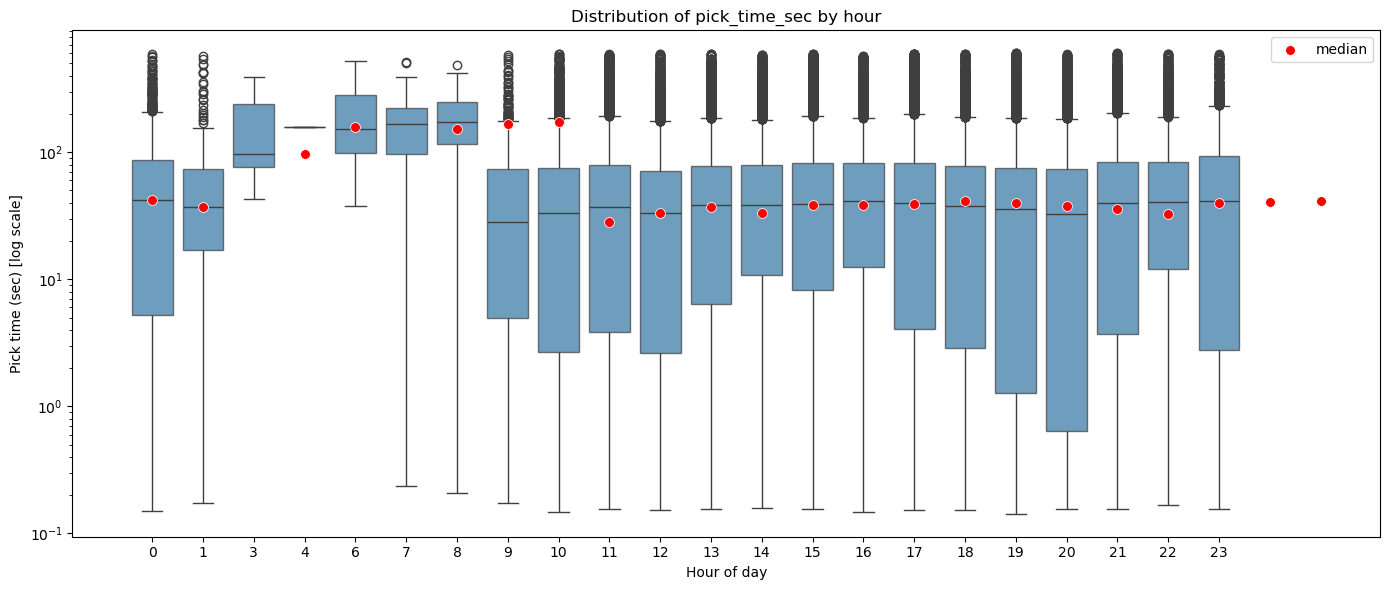

In [ ]:
data = combined_small.dropna(subset=['pick_time_sec', 'hour'])
plt.figure(figsize=(14,6))
sns.boxplot(x='hour', y='pick_time_sec', data=data, showcaps=True, boxprops={'alpha':0.7})
medians = data.groupby('hour')['pick_time_sec'].median().reset_index()
sns.scatterplot(x='hour', y='pick_time_sec', data=medians, color='red', s=50, zorder=10, label='median')
plt.yscale('log')
plt.xlabel('Hour of day')
plt.ylabel('Pick time (sec) [log scale]')
plt.title('Distribution of pick_time_sec by hour')
plt.legend()
plt.tight_layout()
plt.show()